# Lab Assignment #1
# Station Plots

In this part of the lab assignment, you will use the MetPY Python package to read in and decode METAR data, and plot that data as station plots. The station plots will be complete with sky cover and weather symbols.

The station plot itself is pretty straightforward, but there is a bit of Python code at the front to perform some data-wrangling.

The block of code immediately below is known as Python import statements. This is where we load in other Python programs and packages that we will use in this code. You simply need to just run this block of code. To run blocks of code simply hold down the shift key while pressing enter or return. You can also press the "Run" button in the menu bar above to run the selected code block.

In [101]:
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot
from metpy.units import units

from os.path import exists
from urllib.request import urlretrieve
from datetime import datetime
import time

## The Setup

We first have to read in the data the METAR data.

In the block of code below and throughout this assignment, you will see lines of code that begin with #. The # character tells Python to treat this line as a comment. This means Python skips that line. Using comments are a very useful way to explain what the code is doing within the blocks. It is also a useful way to turn on or turn off certain parts of the code.

In [102]:
# Set a variable called fn (filename for short) and point it towards the directory path of the
# text file that contains the metar data. In this example, when you downloaded this Notebook you also downloaded
# a file named metar_20230825_1400.txt which contains several lines of metar data. Note this file contains data
# from August! Keep this in mind for later.
fn = './metar_20230825_1400.txt'

# Set a variable called data and use the MetPY metar file parser to read in the metar data to that variable.
# This is where we use the MetPY Python package to our advantage. Someone else has already written Python code
# that correctly reads in metar data. We are using their package to do the heavy lifting.
data = metar.parse_metar_file(fn)

In [103]:
# We can print the data variable to see what it contains.
# Remove the # from the beginning of the print line and run this code block to see the data.

#print(data)

If you made it this far without errors, then you are doing great! The metar data is read into a Python variable called data. But now we want to visualize this data on a map as station models.

First, we have to set-up the map space.

In [104]:
# Set up the map projection. There are several different types of projections we could use, but we'll stick 
# with the basic Lambert Conformal projection.
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[35])

# Use the Cartopy map projection to transform station locations to the map.
# This uses the latitude and longitude recovered from the metar locations to find where they should be placed
# in the map space.
point_locs = proj.transform_points(ccrs.PlateCarree(), data['longitude'].values,
                                   data['latitude'].values)

# In some scenarios, you could have WAY too many stations to plot, and the map gets crowded. You can use
# this bit of code to refine/reduce the number of stations plotted by setting a 300 km radius. We'll
# leave this off for now.
#data = data[reduce_point_density(point_locs, 300000.)]

## The Payoff

Let's actually make the map and put some data on the map!

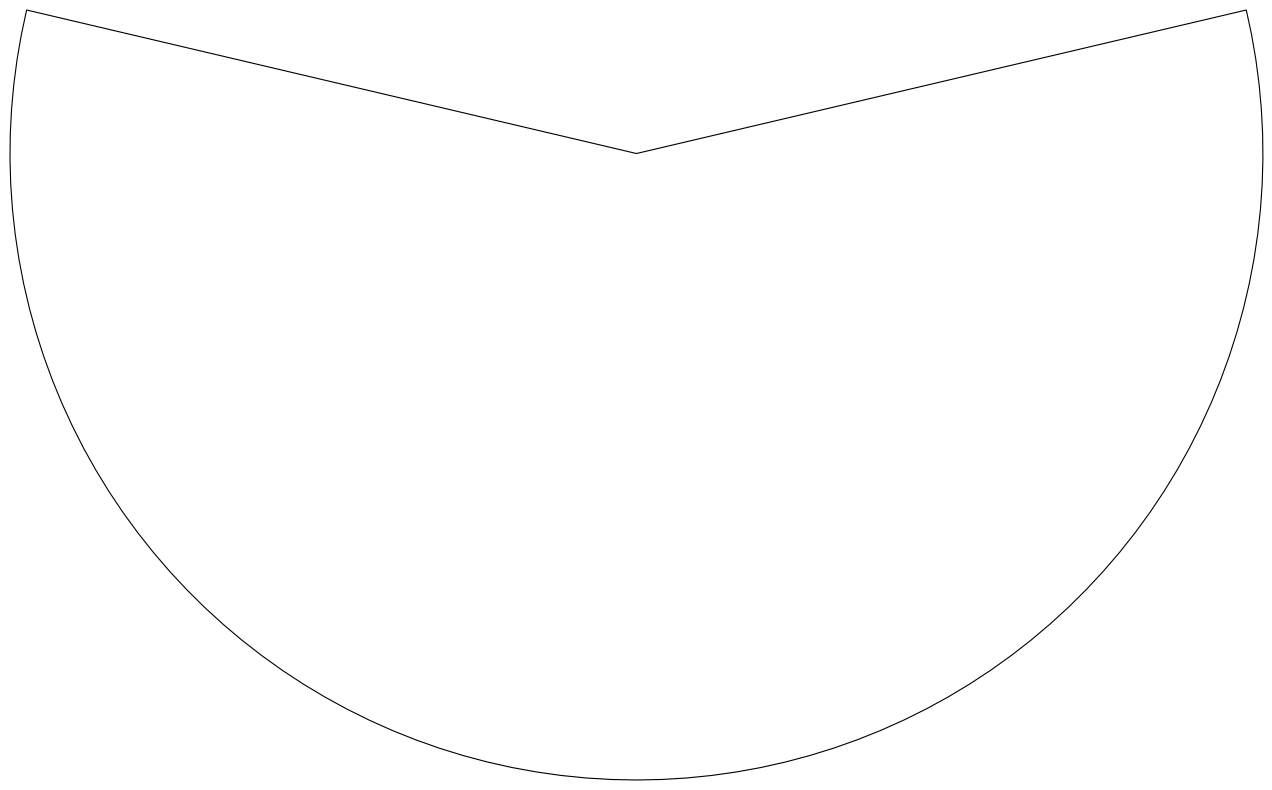

In [105]:
# Change the DPI of the resulting figure. Higher DPI drastically improves the
# look of the text rendering. You can just leave this alone.
plt.rcParams['savefig.dpi'] = 255

# Create the figure and an axes set to the projection.
fig = plt.figure(figsize=(20, 10))
#add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=proj)

OK what you see above looks weird. But this is just the map projection. We have to tell Python to put things on here.

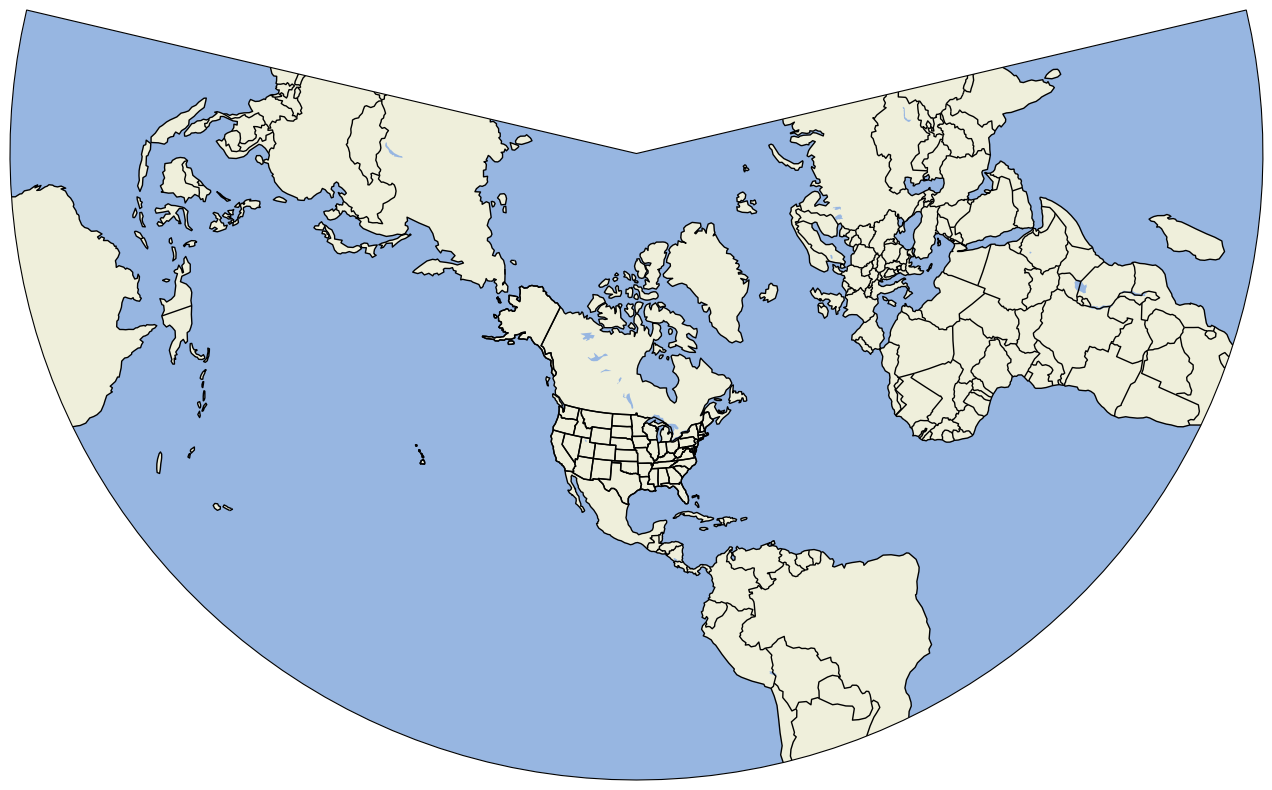

In [106]:
# Add some various map elements to the plot to make it recognizable.
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# One by one, you can turn on/off these map features by placing or removing a # in front of the line. Try it out!
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

Great - this is looking more like a map! But we don't want the whole world. Let's add another bit of code to set the limit of the map.

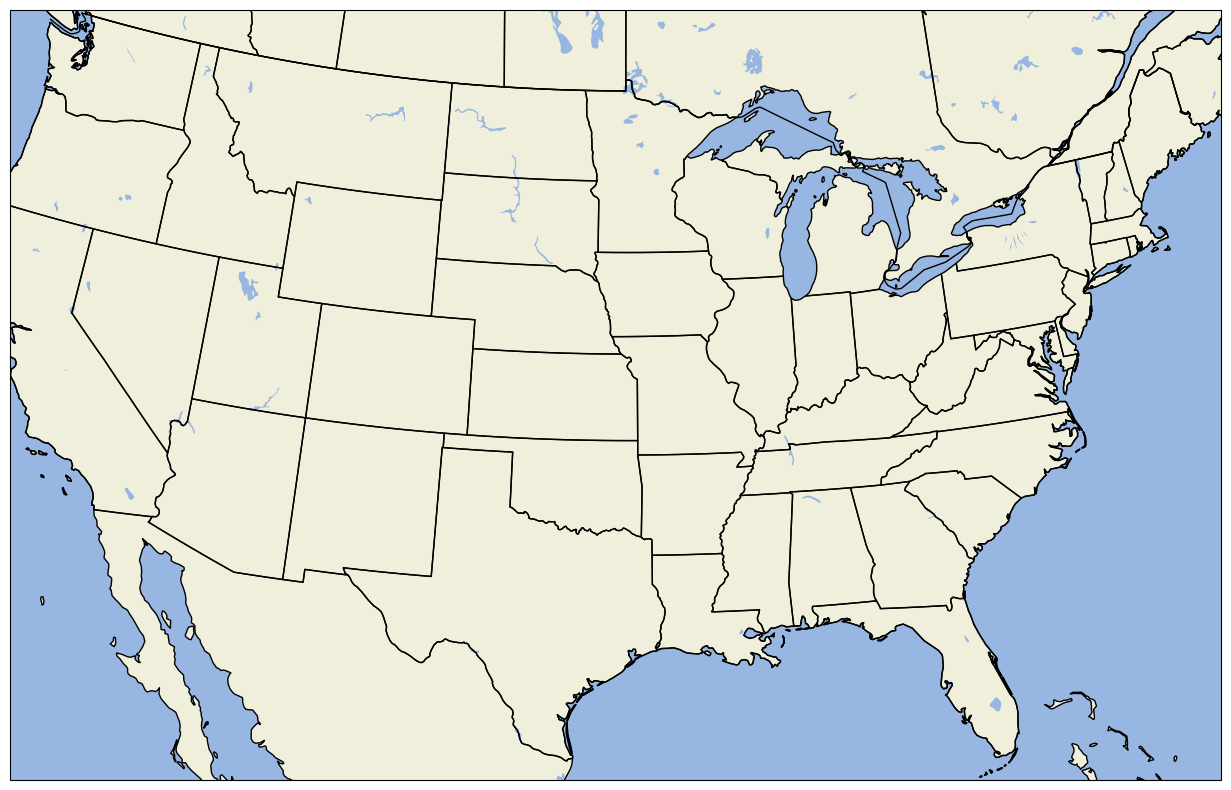

In [107]:
# Add some various map elements to the plot to make it recognizable.
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# One by one, you can turn on/off these map features by placing or removing a # in front of the line. Try it out!
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Now we need to set the actual bounds or limit of the plot. We don't want the whole world, just the US.

ax.set_extent((-118, -73, 23, 50))

Now let's finally add our station model data.

TextCollection

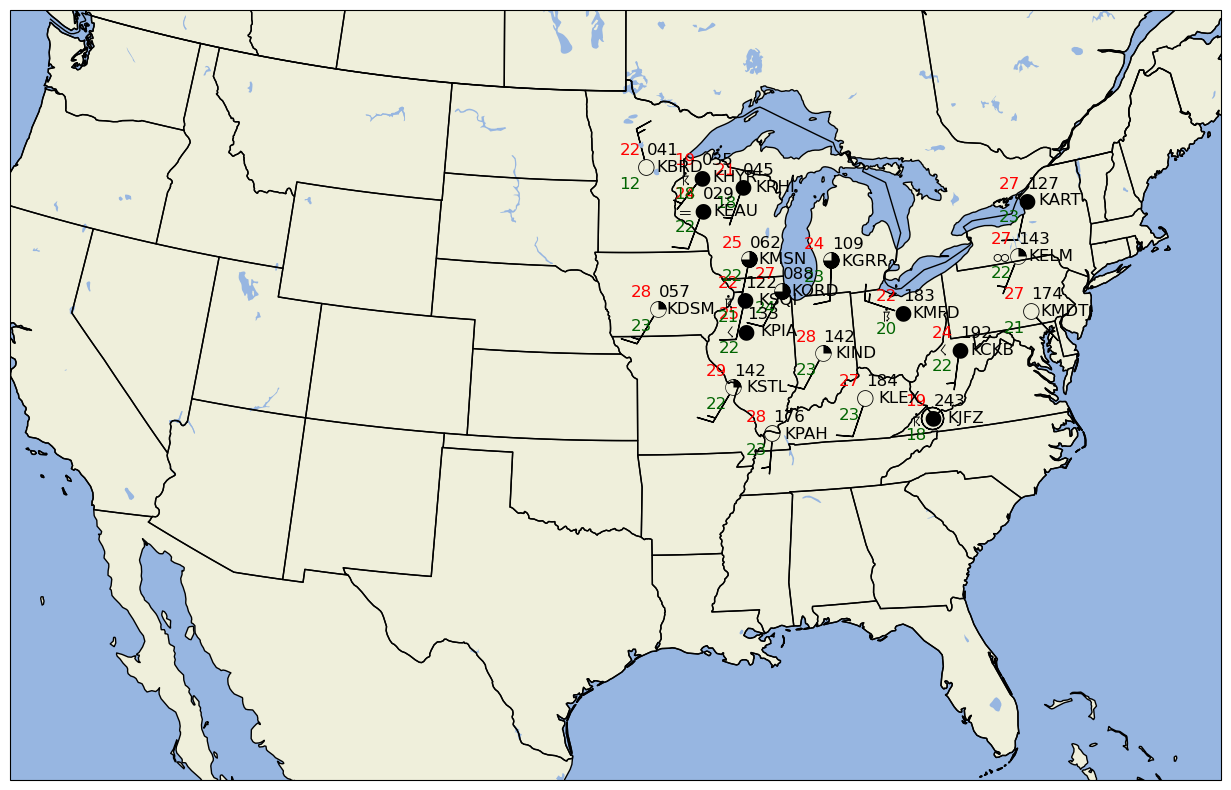

In [108]:
# Add some various map elements to the plot to make it recognizable.
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# One by one, you can turn on/off these map features by placing or removing a # in front of the line. Try it out!
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Now we need to set the actual bounds or limit of the plot. We don't want the whole world, just the US.
ax.set_extent((-118, -73, 23, 50))

#
# Here's the actual station plot code below.
#

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color. You can use different colors if you want.
stationplot.plot_parameter('NW', data['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data['dew_point_temperature'].values, color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', data['current_wx1_symbol'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((2, 0), data['station_id'].values)

That's pretty crowded. I wonder if we can zoom in on just the area with our data? Let's try by setting different latitude and longitude bounds for our map.

TextCollection

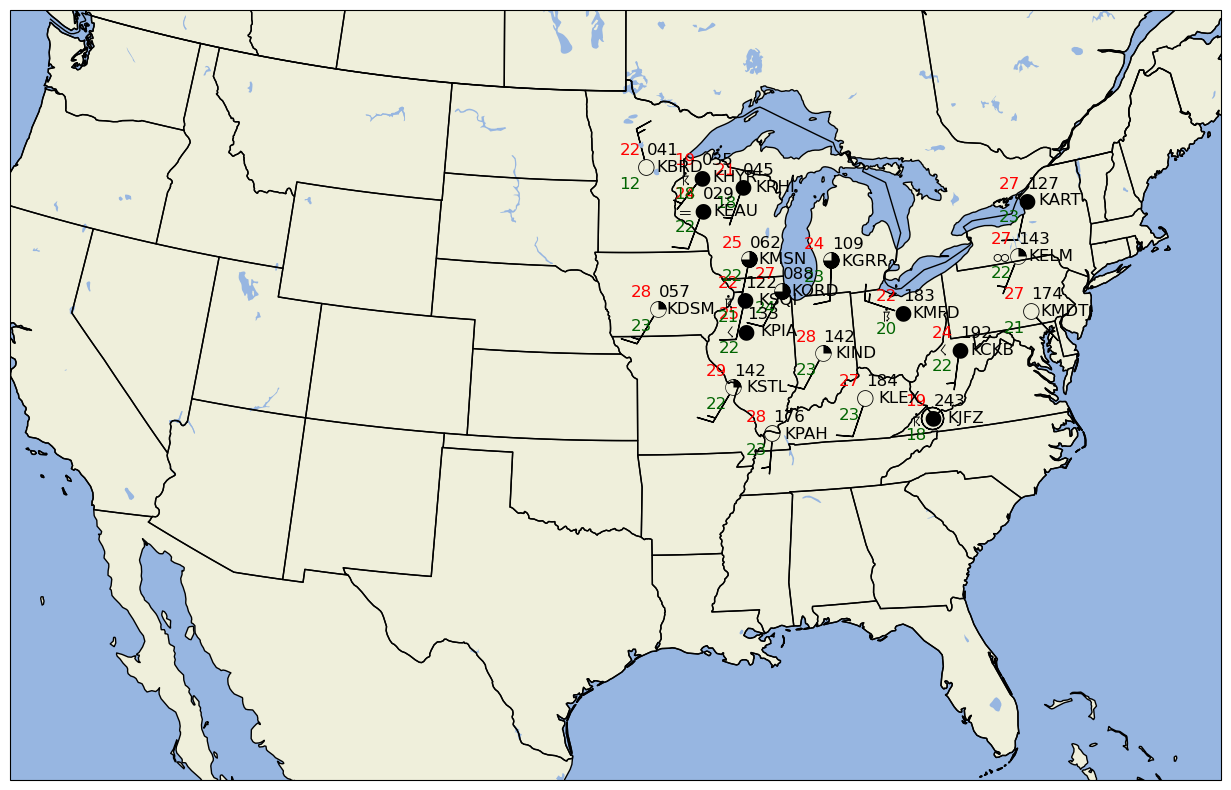

In [109]:
# Set longitude and latitude bounds for the map. The default are the original bounds from the map of the entire US.
# Play around with these values and find something that zooms in on our area of interest. lonW = western most bound,
# lonE = eastern most bound, latS = southern most bound, latN = northern most bound
lonW = -118
lonE = -73
latS = 23
latN = 50

# Add some various map elements to the plot to make it recognizable.
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# One by one, you can turn on/off these map features by placing or removing a # in front of the line. Try it out!
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Now we need to set the actual bounds or limit of the plot. We don't want the whole world, just the US.
ax.set_extent((lonW, lonE, latS, latN))

#
# Here's the actual station plot
#

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', data['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data['dew_point_temperature'].values,
                           color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', data['current_wx1_symbol'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((2, 0), data['station_id'].values)

Let's add a descriptive title to your zoomed map. Keep your text in between the '     ' characters. This tells Python you are adding a string of characters to be used for something.

Text(1.0, 1.0, 'This map was generated on 20230825_2125 by jupyter-murphy')

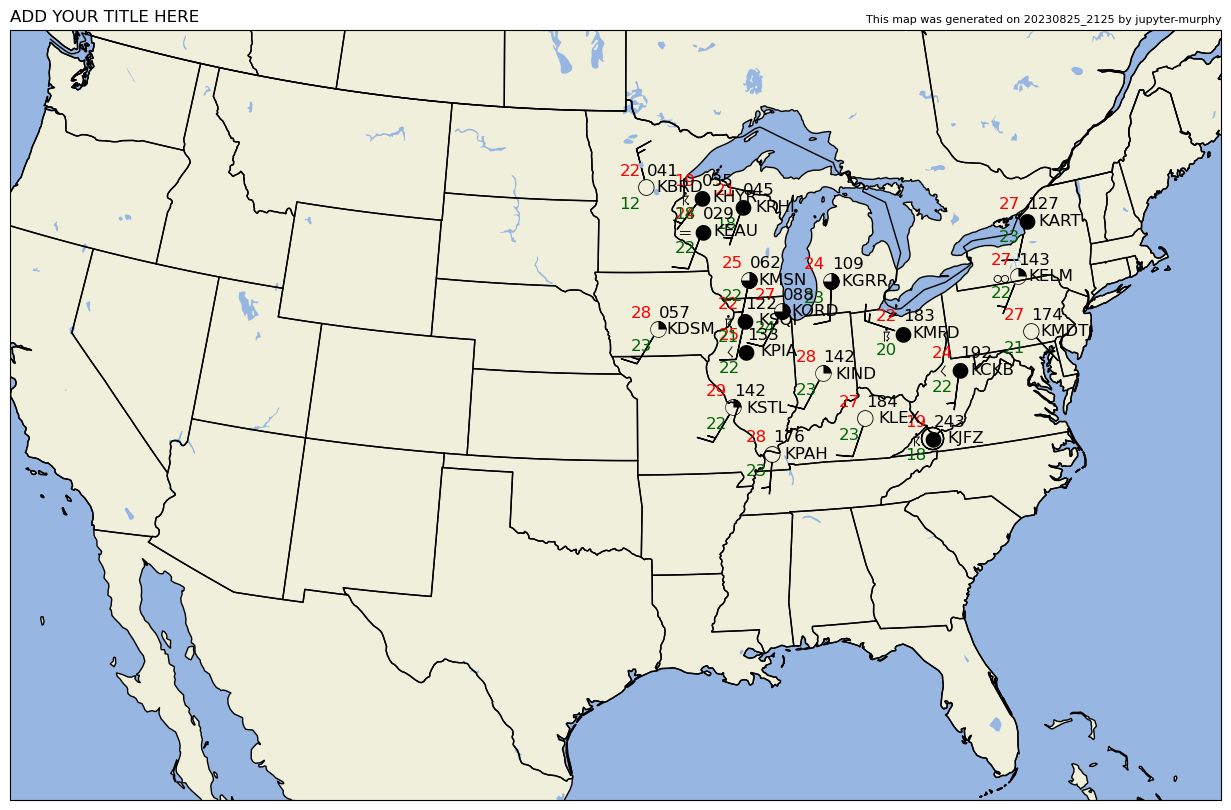

In [118]:
title_text = 'ADD YOUR TITLE HERE'


# Add some various map elements to the plot to make it recognizable.
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

plt.title(title_text, loc = "left")


# One by one, you can turn on/off these map features by placing or removing a # in front of the line. Try it out!
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Now we need to set the actual bounds or limit of the plot. We don't want the whole world, just the US.
ax.set_extent((lonW, lonE, latS, latN))

#
# Here's the actual station plot
#

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', data['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data['dew_point_temperature'].values,
                           color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', data['current_wx1_symbol'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((2, 0), data['station_id'].values)

##Code belows puts a time stamp & username on your map
t = time.gmtime()
current_time = time.strftime("%Y%m%d_%H%M", t)
user = os.environ.get('USER')
plt.title('This map was generated on '+current_time+' by '+user, loc = "right", fontsize = 8)

### Jupyter Task #1
Right click and save the zoomed map you made above. Upload this map to the Moodle lab assignment question labeled Jupyter Task #1. Make sure your map filename includes YOUR name.

### Jupyter Task #2
A problem should immediately be observed with how some of the variables are plotted in these station models. Identify this problem in the Moodle lab assignment question labeled Jupyter Task #2.

# Real Time Data

Now let's do something similar, but bring in real-time metar data. The below block of code uses a function to (1) find the current UTC time and (2) download the most recent hourly metar text file. Run this block to grab your data and set-up the map projection.

In [120]:
def get_real_time_metar_data(fname):
    base_url = 'https://thredds-test.unidata.ucar.edu/thredds/fileServer/noaaport/text/metar/'
    data_dir = '/tmp/'
    path_to_file = data_dir + fname
    
    if exists(path_to_file):
        print(f'File exists: {path_to_file}')
    else:
        print(f"Downloading file '{fname}' from '{base_url+fname}' to '{path_to_file}'.")
        urlretrieve(base_url+fname, path_to_file)

    return path_to_file


# Download metar data in text format.

t = time.gmtime()
current_time = time.strftime("%Y%m%d_%H00", t)
print('The current date/time string is:  ', current_time)

filename = 'metar_'+current_time+'.txt'

metar_data = get_real_time_metar_data(filename)

data = metar.parse_metar_file(metar_data)

# Set up the map projection. There are several different types of projections we could use, but we'll stick 
# with the basic Lambert Conformal projection.
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[35])

# Use the Cartopy map projection to transform station locations to the map.
# This uses the latitude and longitude recovered from the metar locations to find where they should be placed
# in the map space.
point_locs = proj.transform_points(ccrs.PlateCarree(), data['longitude'].values,
                                   data['latitude'].values)

The current date/time string is:   20230825_2100


In [121]:
# We may need to reduce the number of surface stations plotted. The datafile 
# we downloaded has ALL the metar data available. Let's see how the plot looks
# first before turning this on. If you turn it on, you can change the 300000 number
# to edit the radius around which we plot additional stations. The default is a 300 km
# radius. This means no station will have another station within 300 km from it.

#data = data[reduce_point_density(point_locs, 300000.)]

### Jupyter Question Task #3
Each of you were assigned a specific state. Determine the best latitude and longitude bounds to make a map that zooms in to your state. Make sure you add a descriptive title to your map, just like before.

Remember, you may need to turn on the Reduce Point Density line of code above if too many stations are plotting. Play around with the radius to find a good compromise between plotting just enough stations so your state/region map is not too crowded such that stations are overlapping. If you turn it on you will need to re-run that block of code, and the code below. Likewise, each time you change the radius, you will need to re-run that block of code.

Once your happy with your state map, right click and save it. Upload this map to the Moodle lab assignment question labeled Jupyter Task #3. Make sure your map filename includes YOUR name.

Text(1.0, 1.0, 'This map was generated on 20230825_2126 by jupyter-murphy')

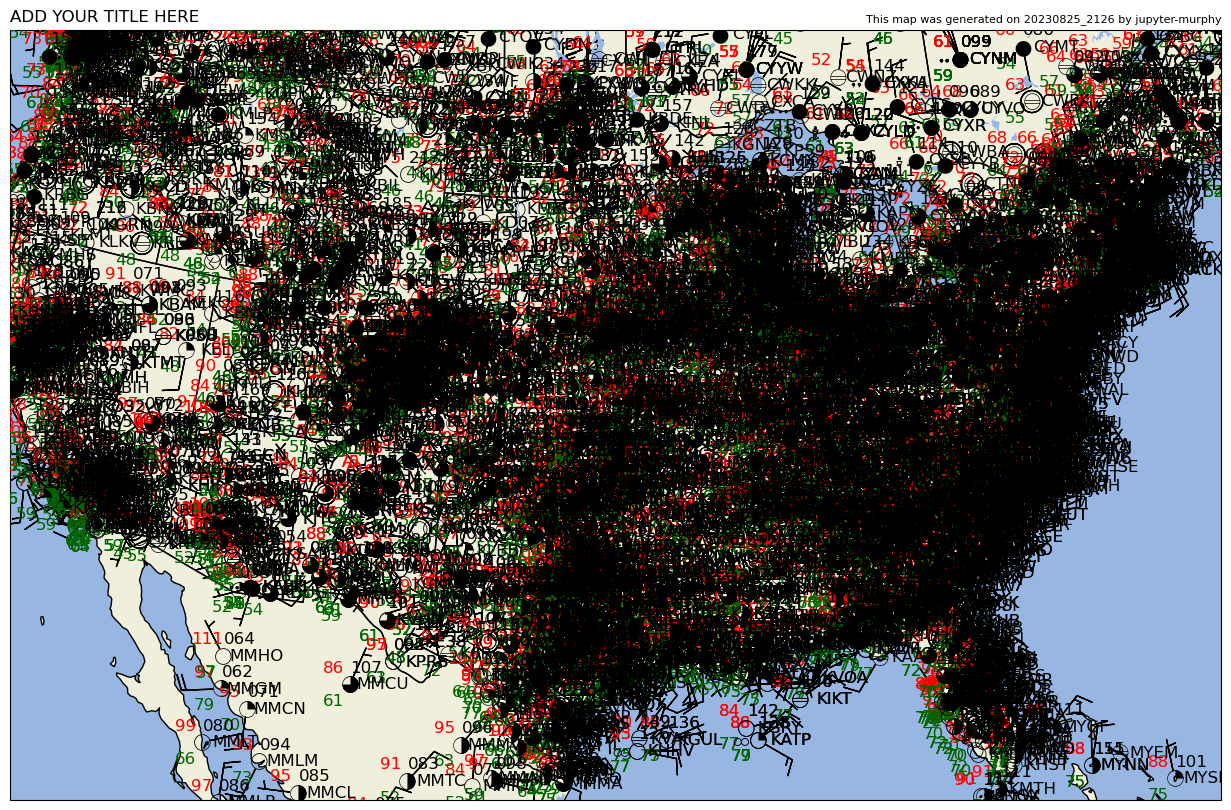

In [122]:
title_text = 'ADD YOUR TITLE HERE'

lonW = -118
lonE = -73
latS = 23
latN = 50

# Add some various map elements to the plot to make it recognizable.
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# One by one, you can turn on/off these map features by placing or removing a # in front of the line. Try it out!
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Now we need to set the actual bounds or limit of the plot. We don't want the whole world, just the US.
ax.set_extent((lonW, lonE, latS, latN))

plt.title(title_text, loc = "left")

#
# Here's the actual station plot code below.
#

temperature = data['air_temperature'].values * units.degC
temperature = temperature.to(units.degF)
dewpoint = data['dew_point_temperature'].values * units.degC
dewpoint = dewpoint.to(units.degF)

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color. You can use different colors if you want.
stationplot.plot_parameter('NW', temperature, color='red')
stationplot.plot_parameter('SW', dewpoint, color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', data['current_wx1_symbol'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((2, 0), data['station_id'].values)

##Code belows puts a time stamp & username on your map
t = time.gmtime()
current_time = time.strftime("%Y%m%d_%H%M", t)
user = os.environ.get('USER')
plt.title('This map was generated on '+current_time+' by '+user, loc = "right", fontsize = 8)

### Jupyter Question Task #4 Bonus
Something is different about how the variables are plotted on this map compared to the regional map you submitted under Task #1. Identify the difference under the Moodle assignment question labeled Jupyter Task #4. Additionally, identify the string of Python code in the code block above that "fixed" this issue by copying the specific lines of code into the Moodle assignment question labeled Jupyter Task #4.